# Praktikum 8: Numerische Methoden für AWP's
### Aufgabe 1+2: Explizites Euler Verfahren + testen an modellfunktion

In [4]:
import numpy as np
import matplotlib.pyplot as plt


### Definition der verschiedenen Verfahren

In [5]:
def RK_explizit(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k = f(x[i-1], y[i-1])
        y[i] = y[i-1] + h*k

    return x, y

# Verfahren von Runge (RK2)
def runge_explizit(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + h*0.5, y[i-1] + h*0.5*k1)
        y[i] = y[i-1] + h*k2

    return x, y

# Verfahren von Heun (RK2)
def heun_explizit(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + h, y[i-1] + h*k1)
        y[i] = y[i-1] + h*(0.5*k1 + 0.5*k2)

    return x, y

# Verfahren Runge-Kutta-Verfahren (RK4)
def runga_kutta_RK4(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        y[i] = y[i-1] + h*((1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4)

    return x, y

### Modelfunktionen und Plots

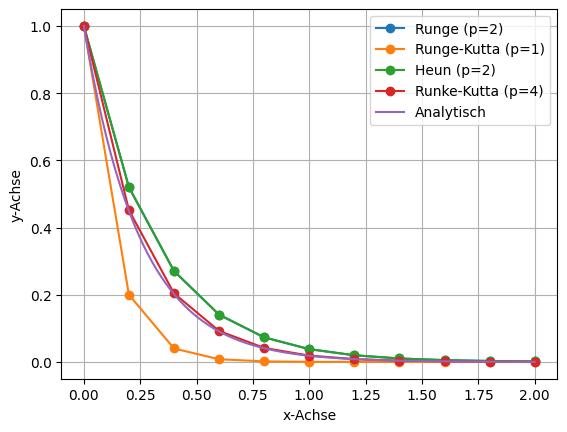

In [6]:
def model1(x, y):
    return -4 * y

def model_analytisch(x):
    return np.exp(-4 * x)

x_an = np.linspace(0,2,100)

x0 = [0, 1] # Startwert x, y
R_RK2_x, R_RK2_y = runge_explizit(x0, 2, 10, model1)
RK_RK1_x, RK_RK1_y = RK_explizit(x0, 2, 10, model1)
H_RK1_x, H_RK1_y = heun_explizit(x0, 2, 10, model1)
RK_RK4_x, RK_RK4_y = runga_kutta_RK4(x0, 2, 10, model1)

plt.plot(R_RK2_x, R_RK2_y, 'o-', label='Runge (p=2)')
plt.plot(RK_RK1_x, RK_RK1_y, 'o-', label='Runge-Kutta (p=1)')
plt.plot(H_RK1_x, H_RK1_y, 'o-', label='Heun (p=2)')
plt.plot(RK_RK4_x, RK_RK4_y, 'o-', label='Runke-Kutta (p=4)')
plt.plot(x_an, model_analytisch(x_an), '-', label='Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

### Test an Differentialgleichung

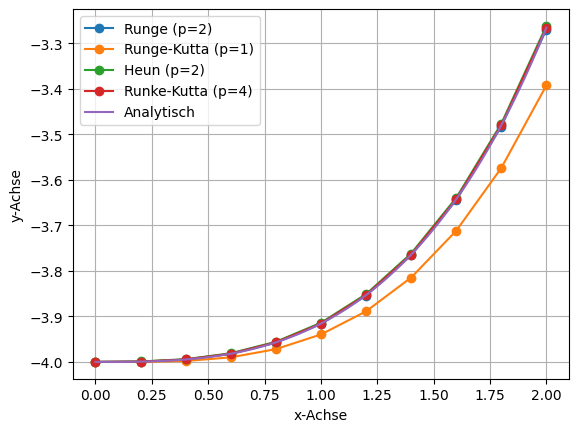

In [7]:
def model2(x, y):
    return -x**2 / y

def model2_analytisch(x):
    return -np.sqrt(2/3) * np.sqrt(24 - x**3)

x_an = np.linspace(0,2,100)

x0 = [0, -4] # Startwert x, y
R_RK2_x, R_RK2_y = runge_explizit(x0, 2, 10, model2)
RK_RK1_x, RK_RK1_y = RK_explizit(x0, 2, 10, model2)
H_RK1_x, H_RK1_y = heun_explizit(x0, 2, 10, model2)
RK_RK4_x, RK_RK4_y = runga_kutta_RK4(x0, 2, 10, model2)

plt.plot(R_RK2_x, R_RK2_y, 'o-', label='Runge (p=2)')
plt.plot(RK_RK1_x, RK_RK1_y, 'o-', label='Runge-Kutta (p=1)')
plt.plot(H_RK1_x, H_RK1_y, 'o-', label='Heun (p=2)')
plt.plot(RK_RK4_x, RK_RK4_y, 'o-', label='Runke-Kutta (p=4)')
plt.plot(x_an, model2_analytisch(x_an), '-', label='Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

### Aufgabe 6: Berechnung des Fehlers

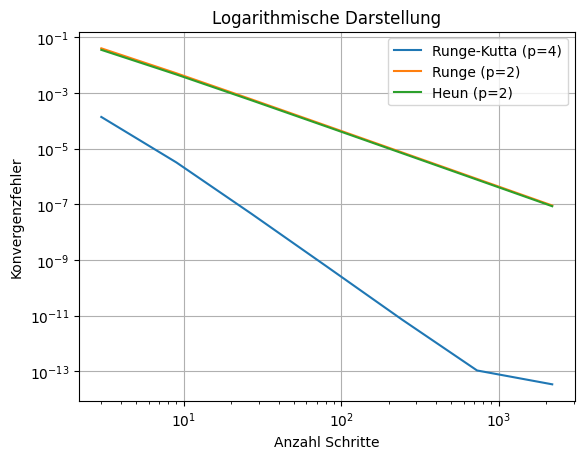

In [8]:
n_vec = list(range(1, 8))  # Vektor [1,2,...,100]
n_vec_3 = []

# Schleife durch jedes Element und erhebe es zum Kubik
for e in n_vec:
    kubik =  3 ** e
    n_vec_3.append(kubik)
#print(n_vec_3)

err_Runge_kutta = []
err_Runge = []
err_Heun = []
for n in n_vec_3:
    #print("Schritt:" ,n)
    x0 = (0, -4)
    x, y = runga_kutta_RK4(x0, 2, n, model2)
    err_Runge_kutta.append(np.linalg.norm(y-model2_analytisch(x),np.inf)) 
    x, y = runge_explizit(x0, 2, n, model2)
    err_Runge.append(np.linalg.norm(y-model2_analytisch(x),np.inf))
    x, y = heun_explizit(x0, 2, n, model2)
    err_Heun.append(np.linalg.norm(y-model2_analytisch(x),np.inf))

err_steps = True
if(err_steps == True):
    plt.figure(2)
    #plt.subplot(221)
    plt.loglog(n_vec_3,err_Runge_kutta,'-', label='Runge-Kutta (p=4)')
    plt.loglog(n_vec_3,err_Runge,'-', label = 'Runge (p=2)')
    plt.loglog(n_vec_3,err_Heun,'-', label = 'Heun (p=2)')
    plt.xlabel('Anzahl Schritte')
    plt.ylabel('Konvergenzfehler')
    plt.title('Logarithmische Darstellung')
    plt.legend()
    plt.grid()
    plt.show()
